## Importing standard libraries

In [1]:
import pandas as pd
import numpy as np  #For mathematical calculations
import seaborn as sns #For data visualization 
import matplotlib.pyplot as plt #For plotting graphs
%matplotlib inline

C:\Users\Velumani\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Reading data

In [3]:
cData=pd.read_csv('bank.csv')
cData_copy=cData.copy() #Making a copy
cData.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

## Names of the variables and shape of the data set

In [4]:
print(cData.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


In [5]:
print(cData.shape)

(5000, 14)


## Get the target column distribution.

Target Variable is 'Personal Loan' No need for ‘ID’, ‘ZIP_Code’ & ‘Experience’ columns for further analysis since ‘ID’ and ‘ZIP_Code’ are just numbers of series & ‘Experience’ is highly correlated with ‘Age’.

## Dropping columns.

In [6]:
!pip install pandas_profiling
import pandas_profiling
cData.profile_report()

In [7]:
cData.drop('ID',axis=1,inplace=True)
cData.drop('ZIP Code',axis=1,inplace=True)

## Study the data distribution in each attribute

## Categorical Independent Variable vs Target Variable

cross tabulation can be given as:  
 Personal Loan     0    1
Education               
1              2003   93
2              1221  182
3              1296  205
cross tabulation in percentages can be given as: 
 Personal Loan         0         1
Education                        
1              0.955630  0.044370
2              0.870278  0.129722
3              0.863424  0.136576


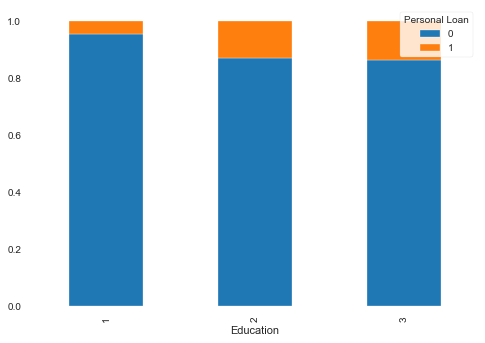

In [7]:
# Personal loan buyers and their education level to get the proportion of purchased and not purchased loans.
edu=pd.crosstab(cData['Education'],cData['Personal Loan'])
edu.div(edu.sum(1).astype(float),axis=0).plot(kind='bar' ,stacked=True)
print('cross tabulation can be given as:',' \n' ,edu)
print('cross tabulation in percentages can be given as:','\n',edu.div(edu.sum(1).astype(float),axis=0))

We can infer that customers who are more educated have a higher probability of buying personal loans. 

cross tabulation can be given as:  
 Personal Loan     0    1
Family                  
1              1365  107
2              1190  106
3               877  133
4              1088  134
cross tabulation in percentages can be given as: 
 Personal Loan         0         1
Family                           
1              0.927310  0.072690
2              0.918210  0.081790
3              0.868317  0.131683
4              0.890344  0.109656


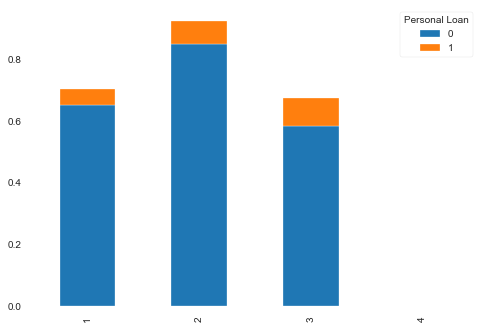

In [31]:
# Plot between the personal loan buyers and their family size 
family=pd.crosstab(cData['Family'],cData['Personal Loan'])
family.div(edu.sum(1).astype(float),axis=0).plot(kind='bar' ,stacked=True)
print('cross tabulation can be given as:',' \n' ,family)
print('cross tabulation in percentages can be given as:','\n',family.div(family.sum(1).astype(float),axis=0))

The number of family members not significantly affect probability. 

cross tabulation can be given as:  
 Personal Loan     0    1
CreditCard              
0              3193  337
1              1327  143
cross tabulation in percentages can be given as: 
 Personal Loan         0         1
CreditCard                       
0              0.904533  0.095467
1              0.902721  0.097279


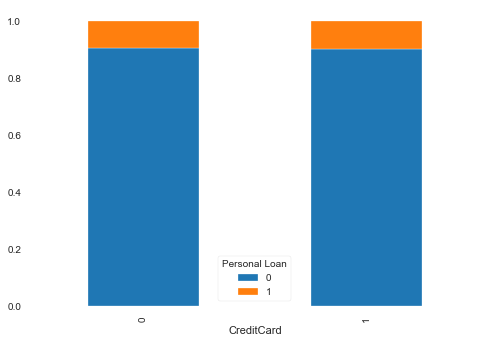

In [30]:
# Personal loan buyers and their education level which will give us the proportion of purchased and not purchased loansersonal loan buyers who use or doesn’t use a credit card issued by UniversalBank
cd=pd.crosstab(cData['CreditCard'],cData['Personal Loan'])
cd.div(cd.sum(1).astype(float),axis=0).plot(kind='bar' ,stacked=True)
print('cross tabulation can be given as:',' \n' ,cd)
print('cross tabulation in percentages can be given as:','\n',cd.div(cd.sum(1).astype(float),axis=0))

The customer who uses or doesn’t use a credit card issued by UniversalBank doesn’t seem to affect the probability of buying a personal loan.

cross tabulation can be given as:  
 Personal Loan     0    1
Online                  
0              1827  189
1              2693  291
cross tabulation in percentages can be given as: 
 Personal Loan        0        1
Online                         
0              0.90625  0.09375
1              0.90248  0.09752


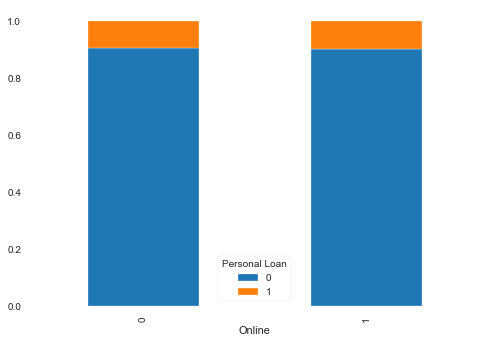

In [29]:
# Personal loan buyer’s customer who uses or doesn’t use internet banking facilities
on=pd.crosstab(cData['Online'],cData['Personal Loan'])
on.div(on.sum(1).astype(float),axis=0).plot(kind='bar' ,stacked=True)
print('cross tabulation can be given as:',' \n' ,on)
print('cross tabulation in percentages can be given as:','\n',on.div(on.sum(1).astype(float),axis=0))

The customer who uses or doesn’t use internet banking facilities seems to not affect the probability of buying personal loans.

cross tabulation can be given as:  
 Personal Loan          0    1
Securities Account           
0                   4058  420
1                    462   60
cross tabulation in percentages can be given as: 
 Personal Loan              0         1
Securities Account                    
0                   0.906208  0.093792
1                   0.885057  0.114943


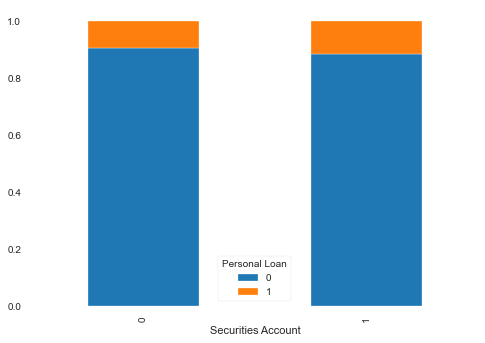

In [28]:
# Personal loan buyer’s customer who has or doesn’t have a securities account with the bank
sec=pd.crosstab(cData['Securities Account'],cData['Personal Loan'])
sec.div(sec.sum(1).astype(float),axis=0).plot(kind='bar' ,stacked=True)
print('cross tabulation can be given as:',' \n' ,sec)
print('cross tabulation in percentages can be given as:','\n',sec.div(sec.sum(1).astype(float),axis=0))

The customers who have or don’t have securities account with the bank do not affect the probability of buying a personal loan.

##  Numerical Independent Variable vs Target Variable

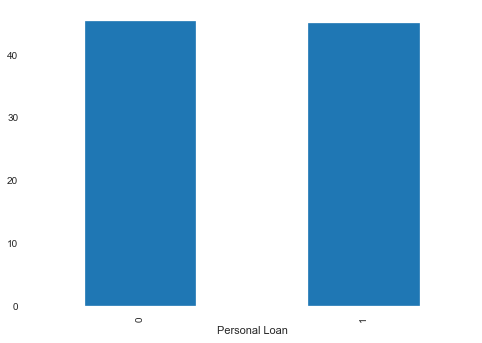

In [32]:
# Age vs Personal Loan
cData.groupby('Personal Loan')['Age'].mean().plot(kind='bar')

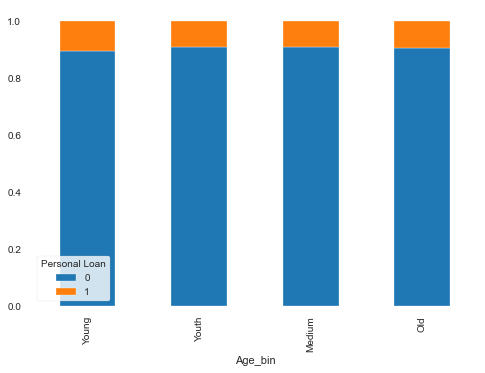

In [33]:
#Using bins bins for the applicant age variable based on the values in it and analyze the corresponding loan status for each bin. 
#To make the bins, we had used pandas.cut() which is used to segment and sort data values into bins.
#This function is also useful for going from a continuous variable to a categorical variable.
bins=[23,35,45,55,67]
group=['Young','Youth','Medium','Old']
cData['Age_bin']=pd.cut(cData['Age'],bins,labels=group)
age=pd.crosstab(cData['Age_bin'],cData['Personal Loan'])
age.div(age.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

It can be inferred that the Applicant age does not affect the chances of buying the personal loan

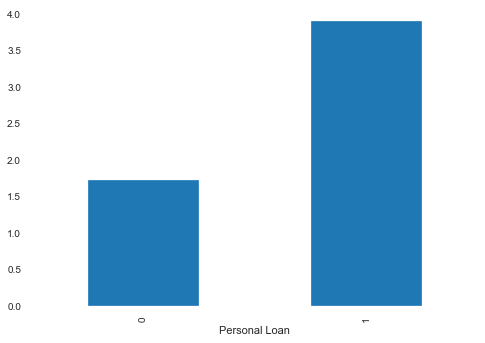

In [34]:
# Personal loan buyer's average spending on credit cards per month
cData.groupby('Personal Loan')['CCAvg'].mean().plot(kind='bar')

It can be clearly seen that applicants who spend more on credit cards are more viable to buy personal loans.

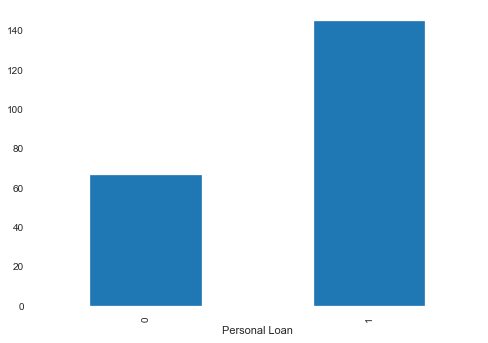

In [35]:
# Income of the customer affect the possibility of a liability customer
cData.groupby('Personal Loan')['Income'].mean().plot(kind='bar')

It can be clearly seen that the customers with high incomes are more feasible to buy the personal loan

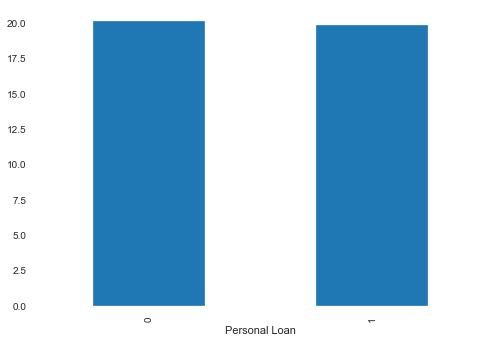

In [36]:
#Using the cData_copy dataset for plotting a graph between personal loan and experience
cData_copy.groupby('Personal Loan')['Experience'].mean().plot(kind='bar')

‘Experience’ is highly correlated with ‘Age’

## Checking the presence of missing values

In [10]:
cData.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## Split the data into training and test set in the ratio of 70:30 respectively

In [8]:
from sklearn.model_selection import train_test_split

X = cData.drop('Personal Loan',axis=1)     # Predictor feature columns (8 X m)
Y = cData['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
1334   47          22      35       2    1.3          1         0   
4768   38          14      39       1    2.0          2         0   
65     59          35     131       1    3.8          1         0   
177    29           3      65       4    1.8          2       244   
4489   39          13      21       3    0.2          2         0   

      Securities Account  CD Account  Online  CreditCard  
1334                   0           0       1           0  
4768                   0           0       1           0  
65                     0           0       1           1  
177                    0           0       0           0  
4489                   0           0       1           0

In [9]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(cData.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(cData.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [10]:
print(x_train.shape)
print(x_test.shape)

(3500, 11)
(1500, 11)


In [11]:
cData.corr() # It will show correlation matrix 

Age  Experience    Income    Family     CCAvg  \
Age                 1.000000    0.994215 -0.055269 -0.046418 -0.052012   
Experience          0.994215    1.000000 -0.046574 -0.052563 -0.050077   
Income             -0.055269   -0.046574  1.000000 -0.157501  0.645984   
Family             -0.046418   -0.052563 -0.157501  1.000000 -0.109275   
CCAvg              -0.052012   -0.050077  0.645984 -0.109275  1.000000   
Education           0.041334    0.013152 -0.187524  0.064929 -0.136124   
Mortgage           -0.012539   -0.010582  0.206806 -0.020445  0.109905   
Personal Loan      -0.007726   -0.007413  0.502462  0.061367  0.366889   
Securities Account -0.000436   -0.001232 -0.002616  0.019994  0.015086   
CD Account          0.008043    0.010353  0.169738  0.014110  0.136534   
Online              0.013702    0.013898  0.014206  0.010354 -0.003611   
CreditCard          0.007681    0.008967 -0.002385  0.011588 -0.006689   

                    Education  Mortgage  Personal Loan  Securities Account  \
Age                  0.041334 -0.012539      -0.007726           -0.000436   
Experience           0.013152 -0.010582      -0.007413           -0.001232   
Income              -0.187524  0.206806       0.502462           -0.002616   
Family               0.064929 -0.020445       0.061367            0.019994   
CCAvg               -0.136124  0.109905       0.366889            0.015086   
Education            1.000000 -0.033327       0.136722           -0.010812   
Mortgage            -0.033327  1.000000       0.142095           -0.005411   
Personal Loan        0.136722  0.142095       1.000000            0.021954   
Securities Account  -0.010812 -0.005411       0.021954            1.000000   
CD Account           0.013934  0.089311       0.316355            0.317034   
Online              -0.015004 -0.005995       0.006278            0.012627   
CreditCard          -0.011014 -0.007231       0.002802           -0.015028   

                    CD Account    Online  CreditCard  
Age                   0.008043  0.013702    0.007681  
Experience            0.010353  0.013898    0.008967  
Income                0.169738  0.014206   -0.002385  
Family                0.014110  0.010354    0.011588  
CCAvg                 0.136534 -0.003611   -0.006689  
Education             0.013934 -0.015004   -0.011014  
Mortgage              0.089311 -0.005995   -0.007231  
Personal Loan         0.316355  0.006278    0.002802  
Securities Account    0.317034  0.012627   -0.015028  
CD Account            1.000000  0.175880    0.278644  
Online                0.175880  1.000000    0.004210  
CreditCard            0.278644  0.004210    1.000000

## Using different classification models to predict the likelihood of a customer buying personal loans.

## Logistic Regression

In [12]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.406279  0.404889  0.049146  0.651687  0.162414  1.655868  0.000795   

          7         8         9        10  intercept  
0 -0.907169  3.261981 -0.576543 -1.005063   -2.37915  


## Score of the model.

In [14]:
model_score = model.score(x_test, y_test)
print(model_score)

0.9453333333333334


## Confusion Matrix for the model.

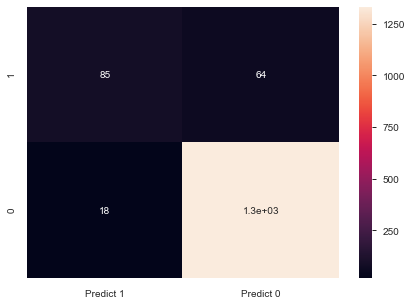

In [15]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [16]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.83      0.57      0.67       149
           0       0.95      0.99      0.97      1351

    accuracy                           0.95      1500
   macro avg       0.89      0.78      0.82      1500
weighted avg       0.94      0.95      0.94      1500



Findings:
It is found that the model accuracy of Logistic Regression is 94.

This means the model gives correct result 94% of the time.

## KNN Algorithm.

In [21]:
from scipy.stats import zscore
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

Age    Experience        Income        Family         CCAvg  \
count  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03   
mean   2.478018e-17 -1.693312e-16  1.939449e-16  7.850609e-16 -2.078338e-17   
std    1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00   
min   -1.948906e+00 -2.014911e+00 -1.428969e+00 -1.216855e+00 -1.108987e+00   
25%   -9.019702e-01 -8.812043e-01 -7.554825e-01 -1.216855e+00 -7.084116e-01   
50%   -2.952359e-02 -9.121982e-03 -2.123482e-01 -3.454321e-01 -2.506106e-01   
75%    8.429230e-01  8.629604e-01  5.263146e-01  5.259909e-01  3.216407e-01   
max    1.889859e+00  1.996667e+00  3.263712e+00  1.397414e+00  4.613525e+00   

          Education      Mortgage  Securities Account    CD Account  \
count  5.000000e+03  5.000000e+03        5.000000e+03  5.000000e+03   
mean  -6.315837e-16  2.810197e-16        5.092149e-16  4.426903e-16   
std    1.000100e+00  1.000100e+00        1.000100e+00  1.000100e+00   
min   -1.049078e+00 -5.555239e-01       -3.414233e-01 -2.535403e-01   
25%   -1.049078e+00 -5.555239e-01       -3.414233e-01 -2.535403e-01   
50%    1.417029e-01 -5.555239e-01       -3.414233e-01 -2.535403e-01   
75%    1.332484e+00  4.375576e-01       -3.414233e-01 -2.535403e-01   
max    1.332484e+00  5.688108e+00        2.928915e+00  3.944146e+00   

             Online    CreditCard  
count  5.000000e+03  5.000000e+03  
mean   2.986500e-16 -3.697931e-16  
std    1.000100e+00  1.000100e+00  
min   -1.216618e+00 -6.453143e-01  
25%   -1.216618e+00 -6.453143e-01  
50%    8.219509e-01 -6.453143e-01  
75%    8.219509e-01  1.549632e+00  
max    8.219509e-01  1.549632e+00

In [22]:
x_train,x_test,y_train,y_test = train_test_split(XScaled, Y, test_size=0.30,random_state=1)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance')

In [24]:
# Call Nearest Neighbour algorithm

NNH.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

## Evaluating Performance of kNN Model

In [25]:
predicted_labels = NNH.predict(x_test)
NNH.score(x_test, y_test)

0.954

## Confusion Matrix for the model.

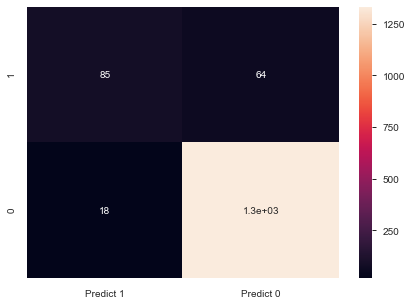

In [26]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [27]:
print("Classification Report")
print(metrics.classification_report(y_test, predicted_labels, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.93      0.58      0.72       149
           0       0.96      0.99      0.97      1351

    accuracy                           0.95      1500
   macro avg       0.94      0.79      0.85      1500
weighted avg       0.95      0.95      0.95      1500



The model accuracy of KNN Classifier is 95.

Thos means the model gives correct result 95% of time

## Naive Bayes Algorithm

## Train Naive Bayes algorithm

In [28]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# create the model
diab_model = GaussianNB()

diab_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

## Performance of model with training data.

In [29]:
diab_train_predict = diab_model.predict(x_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, diab_train_predict)))
print()

Model Accuracy: 0.8900



## Performance of model with testing data

In [30]:
diab_test_predict = diab_model.predict(x_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, diab_test_predict)))
print()

Model Accuracy: 0.8747



## Confusion Matrix for the model.

Confusion Matrix


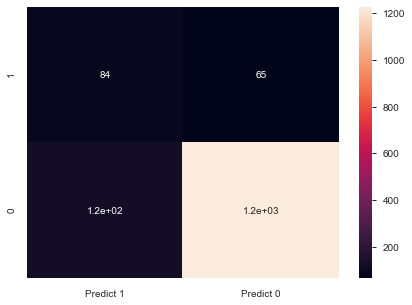

In [31]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, diab_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [32]:
print("Classification Report")
print(metrics.classification_report(y_test, diab_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.41      0.56      0.47       149
           0       0.95      0.91      0.93      1351

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500



The model accuracy of Naive Bayes classifier is 89.

This means model gives correct result 89% of the time.

## Reasoning on which is the best model in this case and why it performs better

Out of the models created ,
it is clear from the scores of the models that KNN Model is the best model 
among Logistic Regresion Model and Naive Bayes Model.


Reasons why KNN Model performs better than the rest is because:
    
    1.KNN doesn't make prior assumption like naive bayes theorem.

    2.In logistic regression, assumption of linearity is used thus some

    points might be away from the line where as in KNN distance from nearby

    points is calculated hence more accuracy is gained.